<a href="https://colab.research.google.com/github/ImmanuelNK/Exercise-DATAMINING/blob/main/Week_7_Responsi_%5BQuestion%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Immanuel Nissi Krissianto - 0706022210032**

# **Week 7**


---


## Random Forest and Gradient Boosting Classifier
Today lab exercise will be using Bank Marketing Dataset
- Download the **Bank Marketing Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
Age <br>
Job : type of job <br>
Marital : marital status <br>
Education <br>
Default: has credit in default? <br>
Housing: has housing loan? <br>
Loan: has personal loan? <br>
Contact: contact communication type <br>
Month: last contact month of year <br>
Day: last contact day of the week <br>
Duration: last contact duration, in seconds. Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). <br>
Campaign: number of contacts performed during this campaign and for
this client (includes last contact) <br>
Pdays: number of days that passed by after the client was last
contacted from a previous campaign (999 means client was not
previously contacted) <br>
Previous: number of contacts performed before this campaign and for
this client <br>
Poutcome: outcome of the previous marketing campaign <br>
y: has the client subscribed a term deposit?

## Import Libraries

In [1]:
#Import Libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import tree

## Load Dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ImmanuelNK/Dataset-DATAMINING/refs/heads/main/Bank.csv", sep=";")
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


## Exploratory Data Analysis
Explore the data to identify patterns within the dataset. <br>
Hint: <br>
* There are no missing values, but some columns contain 'unknown' values. Decide whether it is best to drop it or not.
* The 'admin' and 'management' unique value in the job column represent similar roles, so you can combine them under a single categorical value.




In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [4]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [6]:
# Replacing 'admin' and 'management' with 'admin_management' in the 'job' column
df['job'] = df['job'].replace({'admin': 'admin_management', 'management': 'admin_management'})

df.sample(5)

#To combine the 'admin' and 'management' in column job

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1047,27,blue-collar,married,secondary,no,872,yes,no,cellular,17,apr,1130,3,-1,0,unknown,no
4276,35,admin.,married,secondary,no,147,yes,yes,cellular,29,jan,41,1,184,7,failure,no
3796,66,retired,married,primary,no,206,no,no,cellular,9,feb,479,1,-1,0,unknown,yes
874,38,admin_management,single,tertiary,no,15030,yes,no,cellular,13,may,167,1,174,7,other,no
134,27,technician,single,secondary,no,769,yes,no,unknown,9,may,317,2,-1,0,unknown,no


In [7]:
df['y'].value_counts()

,count
y,
no,4000
yes,521


In [8]:
placeholders = ["unknown", "N/A", "?"]

# Create a DataFrame to store the count of unknown values for each column
unknown_counts = pd.DataFrame({
    "Column": df.columns,
    "Unknown Count": [df[col].isin(placeholders).sum() for col in df.columns]
})

# Display the counts
print(unknown_counts)

       Column  Unknown Count
0         age              0
1         job             38
2     marital              0
3   education            187
4     default              0
5     balance              0
6     housing              0
7        loan              0
8     contact           1324
9         day              0
10      month              0
11   duration              0
12   campaign              0
13      pdays              0
14   previous              0
15   poutcome           3705
16          y              0


In [9]:
df['job'].replace(placeholders, df['job'].mode()[0], inplace=True)
df['education'].replace(placeholders, df['education'].mode()[0], inplace=True)
df['contact'].replace(placeholders, df['contact'].mode()[0], inplace=True)
df['poutcome'].replace(placeholders, df['poutcome'].mode()[0], inplace=True)

# to fill the unknown values in column

<ipython-input-9-390129afd18d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['job'].replace(placeholders, df['job'].mode()[0], inplace=True)
<ipython-input-9-390129afd18d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [10]:
placeholders = ["unknown", "N/A", "?"]

# Create a DataFrame to store the count of unknown values for each column
unknown_counts = pd.DataFrame({
    "Column": df.columns,
    "Unknown Count": [df[col].isin(placeholders).sum() for col in df.columns]
})

# Display the counts
print(unknown_counts)

       Column  Unknown Count
0         age              0
1         job              0
2     marital              0
3   education              0
4     default              0
5     balance              0
6     housing              0
7        loan              0
8     contact              0
9         day              0
10      month              0
11   duration              0
12   campaign              0
13      pdays              0
14   previous              0
15   poutcome           3705
16          y              0


<ipython-input-11-a5bec152eab1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='job', data=df, palette='viridis')


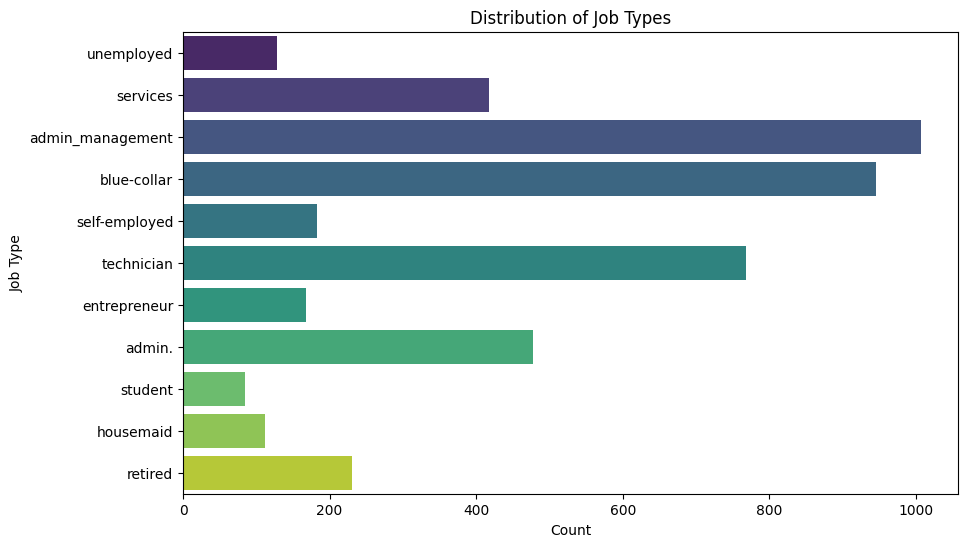

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(y='job', data=df, palette='viridis')
plt.title('Distribution of Job Types')
plt.xlabel('Count')
plt.ylabel('Job Type')
plt.show()

# hotizontal bar plot

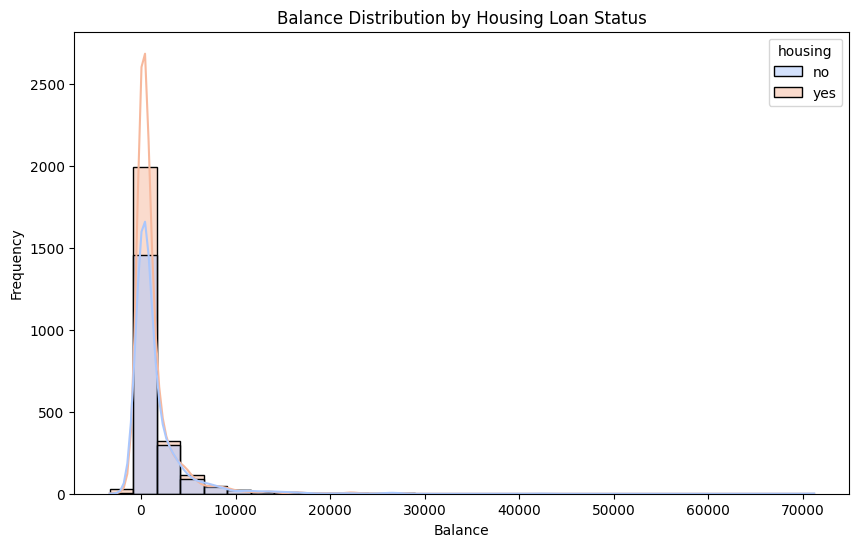

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='balance', hue='housing', kde=True, palette='coolwarm', bins=30)
plt.title('Balance Distribution by Housing Loan Status')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

# Histogram plot to see distribution people with and without housing loan

In [13]:
label_encoder = LabelEncoder()

categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2431,42,10,1,1,0,1289,0,0,0,15,5,250,4,415,2,0,1
279,51,2,0,0,0,37,1,0,0,13,8,341,1,-1,0,3,0
4367,29,1,2,2,0,4210,1,0,0,18,8,119,1,-1,0,3,0
4359,46,4,2,2,0,3232,0,0,1,15,6,94,2,-1,0,3,0
65,51,2,0,1,0,203,1,0,0,8,8,134,1,170,5,0,0
4455,50,2,1,1,0,181,1,0,0,17,0,599,2,-1,0,3,0
1783,38,1,1,2,0,0,1,0,0,20,8,206,1,-1,0,3,0
4158,43,2,1,0,0,483,1,0,0,12,8,225,3,-1,0,3,0
312,43,2,2,0,0,2,1,0,0,30,5,783,3,-1,0,3,0
711,35,4,0,1,0,39,0,0,0,31,5,149,2,-1,0,3,0


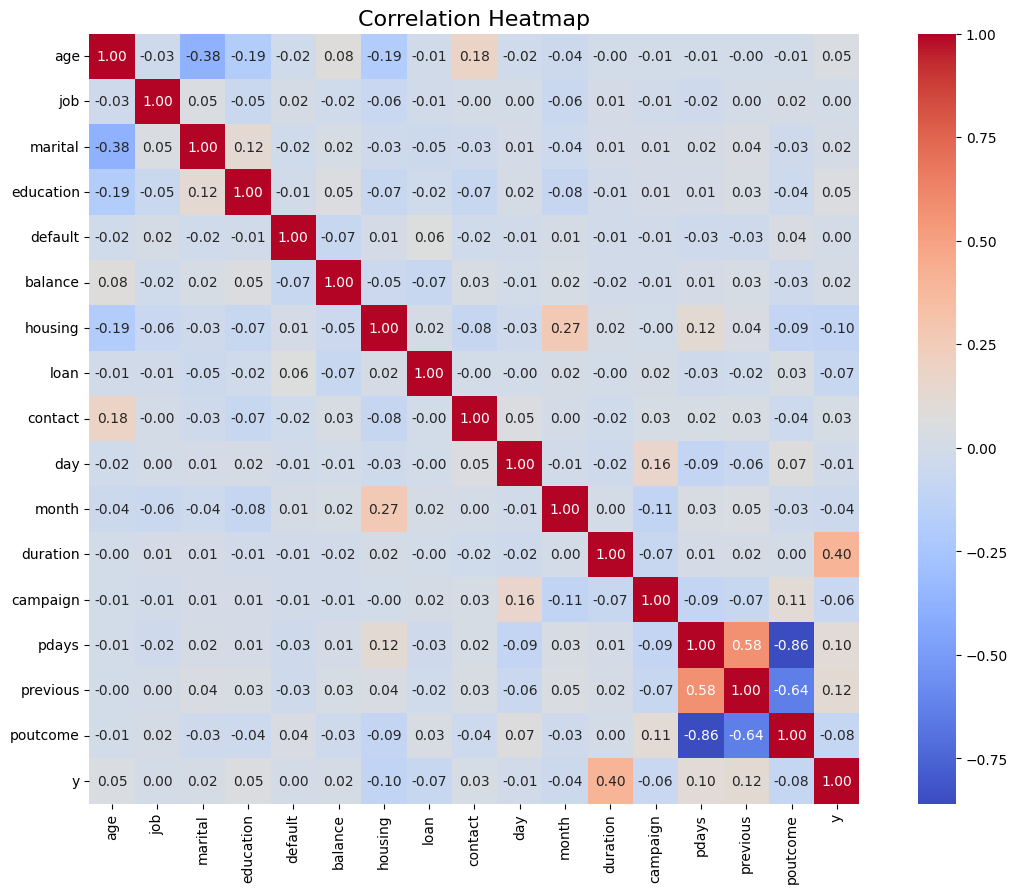

In [14]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# The correlation heatmap shows the correlation of each attributes to the target variable ('y')
# The most related attribute is the duration (last contact duration, in seconds)
# However, some attributes are not very relevant.

## Machine Learning (Split Data)

In [15]:
# Defining X and y, and dropping unnecessary columns
x = df.drop(['y'], axis = 1)
y = df['y']

# In X, I dropped some unnecessary variables due to the unrelated-ness on the heatmap.


In [17]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=0)

x, y = smote_enn.fit_resample(x, y)

print("Class distribution after SMOTEEN:")
print(y.value_counts())

#This code is to balance the data
#this method called SMOTEENN

Class distribution after SMOTEEN:
y
1    3297
0    2770
Name: count, dtype: int64


In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [19]:
x_train.shape, x_test.shape


((4853, 16), (1214, 16))

## Random Forest


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# a. Defining the model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Model fitting
rf_classifier.fit(x_train, y_train)

# Modelling and fitting using random forest classifier, with estimators of 100 times.

RandomForestClassifier(random_state=42)

In [23]:
# b. Predicting the test set results
y_pred_rf = rf_classifier.predict(x_test)

# c. Checking accuracy score
accuracy = accuracy_score(y_test, y_pred_rf)

print(f'Accuracy: {accuracy}')

# Showing the accuracy score based on the y_test and y_pred, and it results with an almost perfect 95.3 percent accuracy, showing almost no errors.


Accuracy: 0.9538714991762768


In [24]:
y_train_rf = rf_classifier.predict(x_train)

test_accuracy = accuracy_score(y_test, y_pred_rf)
training_accuracy = accuracy_score(y_train, y_train_rf)

print('Testing accuracy: {0:0.4f}'.format(test_accuracy))
print('Training accuracy: {0:0.4f}'.format(training_accuracy))

# Since the margin is below 1%, we can conclude that the model is well-fitted.

Testing accuracy: 0.9539
Training accuracy: 1.0000


In [25]:
# d. Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("\nConfusion Matrix Random Forest:")
print(cm_rf)

# Confusion matrix of random forest model, showing that only 6 of the data are false positives or false negatives.



Confusion Matrix Random Forest:
[[551  38]
 [ 18 607]]


In [26]:

# e. Classification Report
class_report_rf = classification_report(y_test, y_pred_rf)

print("Classification Report Random Forest: \n", class_report_rf)

Classification Report Random Forest: 
               precision    recall  f1-score   support

           0       0.97      0.94      0.95       589
           1       0.94      0.97      0.96       625

    accuracy                           0.95      1214
   macro avg       0.95      0.95      0.95      1214
weighted avg       0.95      0.95      0.95      1214



In [ ]:
#f Conclusion
# from the report we know that using random forest the accuracy is 95% or 0.95
# f1 score has similar score in class 0 and class 1
# Precision and recall also has same score just backwards

## Gradient Boosting Classifier


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [29]:

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

gbc_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42, max_features = 4)
gbc_clf.fit(x_train, y_train)

GradientBoostingClassifier(max_features=4, random_state=42)

In [31]:
y_pred_gbc = gbc_clf.predict(x_test)

In [33]:

print('Model accuracy score with GradientBoostingClassifier: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gbc)))

print('Training set score: {0:0.4f}' .format(gbc_clf.score(x_train, y_train)))

print('Test set score: {0:0.4f}' .format(gbc_clf.score(x_test, y_test)))


Model accuracy score with GradientBoostingClassifier: 0.9250
Training set score: 0.9417
Test set score: 0.9250


In [34]:

GBC = confusion_matrix(y_test, y_pred_rf)
print('Confusion matrix GradientBoostingClassifier: \n', GBC)

print('\nClassification Report GradientBoostingClassifier:')
print(classification_report(y_test, y_pred_gbc))


Confusion matrix GradientBoostingClassifier: 
 [[551  38]
 [ 18 607]]

Classification Report GradientBoostingClassifier:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       589
           1       0.92      0.93      0.93       625

    accuracy                           0.93      1214
   macro avg       0.93      0.92      0.92      1214
weighted avg       0.93      0.93      0.93      1214



In [ ]:
#f Conclusion
# from the report we know that using random forest the accuracy is 93% or 0.93
# f1 score has similar score in class 0 and class 1
# Precision and recall also has similar score just backwards

**CONCLUSION**

In [ ]:
#From the report we known that Random forest has better result than the Boosting Method
#However, boosting Method also has good result eventhough not as good as random forest
#Also by using SMOTEENN method, we can make the unbalance data become balance